In [1]:
import numpy as np
import pandas as pd
from scipy.stats import betabinom
from matplotlib import pyplot as plt
import sys
from pathlib import Path

# Get the parent directory
parent_dir = str(Path("").resolve().parent.parent)

# Append the parent directory to sys.path
sys.path.append(parent_dir)

# Now you can import your module (assuming the module name is 'mymodule')
from animation import Animation

In [46]:
df = pd.read_csv("collected_data/data.csv", index_col = 0)
for col in df.columns:
    if "not_let_pass" in col:
        df[col] = 1 - df[col]

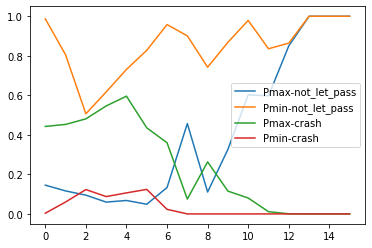

In [47]:
validcols = list(df.columns)
validcols.remove("state")

fig, ax = plt.subplots()

time = list(df.index)
for col in validcols:
    plt.plot(time, df[col], label=col)
plt.legend()


plt.show()

In [48]:
for i in df.index:
    print(df.loc[i, "state"])

turn=1 & crashed=0 & car_x=15 & car_v=5 & finished=0 & ped_x=40 & ped_y=0
turn=1 & crashed=0 & car_x=20 & car_v=5 & finished=0 & ped_x=38 & ped_y=0
turn=1 & crashed=0 & car_x=26 & car_v=5 & finished=0 & ped_x=40 & ped_y=0
turn=1 & crashed=0 & car_x=31 & car_v=5 & finished=0 & ped_x=43 & ped_y=0
turn=1 & crashed=0 & car_x=36 & car_v=5 & finished=0 & ped_x=46 & ped_y=2
turn=1 & crashed=0 & car_x=40 & car_v=4 & finished=0 & ped_x=46 & ped_y=5
turn=1 & crashed=0 & car_x=42 & car_v=2 & finished=0 & ped_x=49 & ped_y=5
turn=1 & crashed=0 & car_x=42 & car_v=0 & finished=0 & ped_x=46 & ped_y=8
turn=1 & crashed=0 & car_x=42 & car_v=0 & finished=0 & ped_x=45 & ped_y=5
turn=1 & crashed=0 & car_x=42 & car_v=0 & finished=0 & ped_x=46 & ped_y=7
turn=1 & crashed=0 & car_x=42 & car_v=0 & finished=0 & ped_x=49 & ped_y=8
turn=1 & crashed=0 & car_x=44 & car_v=2 & finished=0 & ped_x=46 & ped_y=10
turn=1 & crashed=0 & car_x=49 & car_v=5 & finished=0 & ped_x=49 & ped_y=12
turn=1 & crashed=0 & car_x=54 & car_

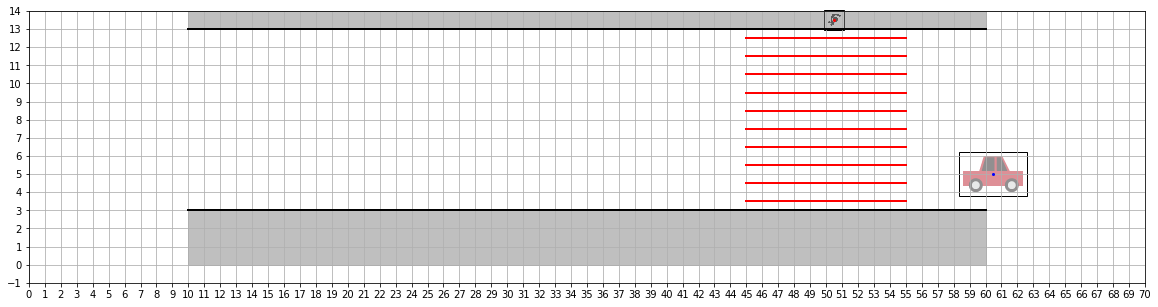

In [52]:
A = Animation('params_files/params_example.json')
A.create_animation('tmp/trace.txt')

In [42]:
n = 3
pedestrian_speeds = np.zeros(n+1)

mu = 1.9
sigma = 1
alpha = -mu*(mu**2 - n*mu + sigma)/(mu**2 - n*mu + n*sigma)
beta = (mu - n)*(mu**2 - n*mu + sigma)/(mu**2 - n*mu + n*sigma)
randomvar = betabinom(n, alpha, beta)
for i in range(len(pedestrian_speeds)):
    pedestrian_speeds[i] = randomvar.pmf(i)
print(alpha, beta)

2.275824175824173 1.317582417582416


In [43]:
pedestrian_speeds

array([0.1097279 , 0.22581631, 0.31918369, 0.3452721 ])

In [28]:
np.sum(pedestrian_speeds)

1.0

In [29]:
mu**2 - n*mu + n*sigma

0.25

In [30]:
alpha

7.5

In [31]:
beta

1.5

In [6]:
with open('trace.txt', 'r') as fp:
    tracestr = fp.read()

In [10]:
df = pd.read_csv('trace.txt', sep = ' ')
trace = []
for i in df.index:
    trace.append((df.loc[i, 'car_x'], df.loc[i,'car_v'], df.loc[i, 'ped_x'], df.loc[i, 'ped_y']))

In [11]:
df['crash'] = 

,action,step,turn,crashed,car_x,car_v,finished,ped_x,ped_y
0,-,0,0,0,25,2,0,40,0
1,Car,1,1,0,27,2,0,40,0
2,Ped,2,0,0,27,2,0,42,0
3,Car,3,1,0,29,2,0,42,0
4,Ped,4,0,0,29,2,0,44,0
5,Car,5,1,0,31,2,0,44,0
6,Ped,6,0,0,31,2,0,45,0
7,Car,7,1,0,33,2,0,45,0
8,Ped,8,0,0,33,2,0,42,3
9,Car,9,1,0,35,2,0,42,3


In [11]:
dictA = {"a" : 0.1, "b": ": 2", "c": 2}

In [12]:
dictA

{'a': 0.1, 'b': ': 2', 'c': 2}

In [13]:
dictB =  {"a" : 0.1, "c": 2, "b": ": 2" }

In [14]:
dictA == dictB

True

In [15]:
pd

NameError: name 'pd' is not defined

In [6]:
import gymnasium as gym
import numpy as np

In [7]:
box = gym.spaces.Box(low = 1, high = 5, dtype=np.int32)

In [18]:
reses = {}

for i in range(100000):
    aux = box.sample()[0]
    if aux not in reses:
        reses[aux] = 1
    else:
        reses[aux] +=1
        
print(reses)

{1: 19963, 3: 20167, 4: 19989, 2: 19940, 5: 19941}
